## Data Science e Machine Learning na Prática - Introdução e Aplicações na Indústria de Processos

## Exercício 1

Procure na API ou no guia do usuário do scikit-learn outro modelo e outras métricas para avaliação de resultados de regressão e as utilize para reproduzir os passos acima. Dependendo da sua escolha, talvez seja necessário importar novos módulos do scikit-learn, como fiz no começo do notebook.

In [1]:
# importação de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### Importação de Dados

In [2]:
boston = datasets.load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Análise dos dados

In [3]:
# Transformando os dados em data frame

boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['MEDV'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_corr = boston_df.corr().MEDV.drop('MEDV').sort_values(ascending = False)

boston_corr

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

Os indicadores que possuem maior correlação com o preço são:

LSTAT - Representa a procentagem de pessoas de baixa renda da população que possui correlação negativa. Indicando que quanto maior a população de baixa renda menor o preço das propriedades;  
RM - Número médio de quartos por habitação que apresenta uma correlação positiva;  
PTRATIO - Proporção de professores por aluno no local que apresenta uma correlação positiva;   
INDUS - proporção de acres de negócios não varejistas por cidade;  
TAX - Taxa de impost por propriedade que apresenta uma correlação negativa;   
NOX - Concentração de óxidos nitricos que apresenta correlação negativa (essa correlação é contra intuítiva. Talvez essa correlação esteja ligada a área com alta de concentração de óxidos nitricos são zonas rurais que apresentam preços mais baixos).


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Não há dados faltantes.

### Machine Learning

Como modelo será usado arvore de decisão, regressão linear, KNN e florestas aleatorias.  
Será medido a qualidade do modelo com a média quadrada do erro, media absoluta do erro.

(para alguns métodos serem mais precisos é necessário normalizar os dados de entrada com média 0 e devio padrão 1)

In [6]:
n_boston_df = (boston_df.iloc[:, :-1] - boston_df.iloc[:, :-1].mean())/boston_df.iloc[:, :-1].std()

n_boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [7]:
X_train, X_test, y_train, y_test = train_test_split(n_boston_df,
                                                    boston.target,
                                                    test_size = 0.3,
                                                    random_state = 1)

models = {
    'random_forest': {'model': RandomForestRegressor()},
    'decision_tree': {'model': DecisionTreeRegressor()},
    'linear_regression': {'model': LinearRegression()},
    'k_nearest_neighbor': {'model': KNeighborsRegressor()}
}


for key in models.keys():
    models[key]['model'].fit(X_train, y_train)
    prediction = models[key]['model'].predict(X_test)
    models[key]['MSE'] = mean_squared_error(prediction, y_test)
    models[key]['MSA'] = mean_absolute_error(prediction, y_test)
    models[key]['r2'] = r2_score(y_test, prediction)
    print(models[key])

{'model': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False), 'MSE': 8.579134605263164, 'MSA': 2.2451842105263164, 'r2': 0.9063970038287997}
{'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'), '

O modelo que apresentou melhor ajuste aos dados de florestas aleatórias.

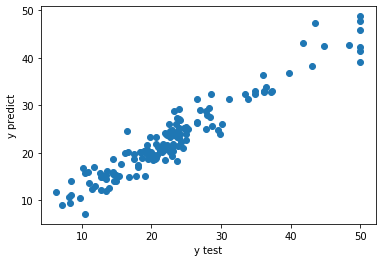

In [8]:
plt.scatter(y_test, models['random_forest']['model'].predict(X_test))
plt.xlabel('y test')
plt.ylabel('y predict')
plt.show()

### Feature engineering

Para aumentar a precisão do método podemos verificar se as colunas com menor correlação com os dados ajudam a predizer o valor ou só adicionam ruído. Para isso será treinado os métodos com um número crescente de colunas começando com a que possui maior correlação e terminando com a que possui menor correlação.

In [9]:
columns = boston_corr.abs().sort_values(ascending = False).index

models_columns = dict()

for i in range(1, len(columns) + 1):
    X_train, X_test, y_train, y_test = train_test_split(n_boston_df.iloc[:, :i],
                                                        boston.target,
                                                        test_size = 0.3,
                                                        random_state = 1)
    
    
    models = {
        'random_forest': {'model': RandomForestRegressor()},
        'decision_tree': {'model': DecisionTreeRegressor()},
        'linear_regression': {'model': LinearRegression()},
        'k_nearest_neighbor': {'model': KNeighborsRegressor()}
    }
    MSA = dict()

    for key in models.keys():
        models[key]['model'].fit(X_train, y_train)
        prediction = models[key]['model'].predict(X_test)
        MSA[key] = mean_squared_error(prediction, y_test)
        
        
    models_columns[i] = MSA.copy()
    MSA.clear
  
models_MSA = pd.DataFrame(models_columns).T
models_MSA

,random_forest,decision_tree,linear_regression,k_nearest_neighbor
1,81.261649,107.452434,80.672970,71.542339
2,61.415120,84.826974,75.175954,56.762468
3,51.719399,67.274737,66.846755,46.241689
4,39.485511,70.061184,63.219154,41.170361
5,33.535269,54.207237,64.637838,37.827734
6,14.546885,23.028750,29.833101,19.280750
7,15.570787,19.612895,30.209083,19.352887
8,15.404650,33.825921,27.461747,17.771297
9,13.966788,35.232632,27.299433,18.523505
10,14.223980,33.980000,26.489805,19.714942


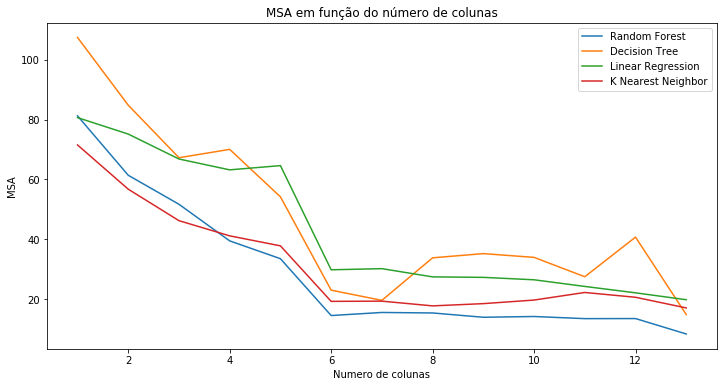

In [10]:
plt.figure(figsize = (12,6))
plt.plot(models_MSA.index, models_MSA.random_forest, label = 'Random Forest')
plt.plot(models_MSA.index, models_MSA.decision_tree, label = 'Decision Tree')
plt.plot(models_MSA.index, models_MSA.linear_regression, label = 'Linear Regression')
plt.plot(models_MSA.index, models_MSA.k_nearest_neighbor, label = 'K Nearest Neighbor')
plt.title('MSA em função do número de colunas')
plt.xlabel('Numero de colunas')
plt.ylabel('MSA')
plt.legend()
plt.show()

O aumento do número de colunas em todos os modelos levou a uma diminuição do erro. O melhor modelo sem alteração foi o de florestas aleatórias com 13 colunas.

## Exercício 2

Na segunda célula:
Repita todo o procedimento para o conjunto de dados diabetes.

### Importando Dados

In [11]:
diabets = datasets.load_diabetes()

print(diabets.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### Análise dos dados

In [12]:
diabets_df = pd.DataFrame(diabets.data, columns = diabets.feature_names)
diabets_df['target'] = diabets.target

diabets_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [13]:
diabets_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Não há dados faltantes.

In [14]:
diabets_corr = diabets_df.corr().target.drop('target').sort_values(ascending = False)

diabets_corr

bmi    0.586450
s5     0.565883
bp     0.441484
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64

### Model Selection

In [15]:
def select_model(features, target):
    models = [
        {
            'name': 'Random Forest',
            'estimator': RandomForestRegressor(),
            'hyperparameters': {
                'n_estimators': [1, 5, 10, 20, 50, 100], # 1 estimator é igual a arvore de decisão
                'max_depth': [2, 5, 10],
                "min_samples_leaf": [1, 5, 8],
                "min_samples_split": [2, 3, 5]
            }
        },
        {
            'name': 'Linear Regression',
            'estimator': LinearRegression(),
            'hyperparameters': {
                'normalize': [True, False]
            }
        },
        {
            'name': 'K Nearest Neighbor',
            'estimator': KNeighborsRegressor(),
            'hyperparameters':{
                "n_neighbors": range(1,20,2),
                "weights": ["distance", "uniform"],
                "algorithm": ["ball_tree", "kd_tree", "brute"],
                "p": [1,2]
            }
        }
    ]
    
    best_parameters = dict()
    best_estimator = dict()
    best_score = dict()
    
    for model in models:
        grid = GridSearchCV(model['estimator'],
                            param_grid = model['hyperparameters'],
                            cv = 5)
        grid.fit(features, target)
        best_estimator[model['name']] = grid.best_estimator_
        best_parameters[model['name']] = grid.best_params_
        best_score[model['name']] = grid.best_score_
        
    return best_estimator, best_parameters, best_score

In [16]:
best_estimator, best_parameters, best_score = select_model(diabets_df.drop('target', axis = 1), diabets.target)

print(best_score)
print(best_estimator)

{'Random Forest': 0.456183571213289, 'Linear Regression': 0.48231812211149394, 'K Nearest Neighbor': 0.45412340315839084}
{'Random Forest': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False), 'Linear Regression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True), 'K Nearest Neighbor': KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='distance')}


O modelo que se ajustou mais aos dados foi de regressão linear sem alteração

### Feature engineering

In [17]:
columns = diabets_corr.abs().sort_values(ascending = False).index

r2 = dict()

for i in range(1, len(columns) + 1):
    X_train, X_test, y_train, y_test = train_test_split(diabets_df.iloc[:, :i],
                                                        diabets.target,
                                                        test_size = 0.3,
                                                        random_state = 1)
    model = LinearRegression()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    r2[i] = r2_score(y_test, prediction)

r2

{1: 0.007504871049609285,
 2: 0.007689288117900928,
 3: 0.19350265694391477,
 4: 0.2566177587833022,
 5: 0.256741719781974,
 6: 0.2552025750188185,
 7: 0.39609616808959713,
 8: 0.39529780219458444,
 9: 0.4359090224068787,
 10: 0.4384569849129575}

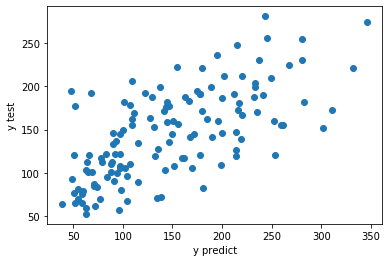

In [18]:
plt.scatter(y_test, prediction)
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

O melhor modelo para esses dados de diabets ainda não apresentaram resultados muito satisfatórios e possui um erro elevado.